# **Assignment 2 (Deep Neural Networks) - 160204107**

**Adjustment - 1**

**Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import cv2
import os

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import re
from PIL import Image
import pickle

## **Step - 1**

### **Drive and Directories**

**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Directories**

In [ ]:
directory = r'/content/drive/MyDrive/Soft Computing 4.2/Deep Neural Networks Dataset/'
img_folder = r'/content/drive/MyDrive/Soft Computing 4.2/Deep Neural Networks Dataset/training-c'
df = pd.read_csv('/content/drive/MyDrive/Soft Computing 4.2/Deep Neural Networks Dataset/training-c.csv')
df2_Train = pd.read_csv('/content/drive/MyDrive/Soft Computing 4.2/Deep Neural Networks Dataset/verification_train.csv')
df2_Test = pd.read_csv('/content/drive/MyDrive/Soft Computing 4.2/Deep Neural Networks Dataset/verification_test.csv')
df

,filename,original filename,scanid,digit,database name original,contributing team,database name
0,c00000.png,Scan_280_digit_6_num_7.png,280,6,OngkoDB,Buet_Backpropers,training-c
1,c00001.png,Scan_29_digit_1_num_1.png,29,1,OngkoDB,Buet_Backpropers,training-c
2,c00002.png,Scan_131_digit_3_num_1.png,131,3,OngkoDB,Buet_Backpropers,training-c
3,c00003.png,Scan_160_digit_2_num_2.png,160,2,OngkoDB,Buet_Backpropers,training-c
4,c00004.png,Scan_202_digit_7_num_0.png,202,7,OngkoDB,Buet_Backpropers,training-c
...,...,...,...,...,...,...,...
24293,c24293.png,Scan_167_digit_3_num_4.png,167,3,OngkoDB,Buet_Backpropers,training-c
24294,c24294.png,Scan_174_digit_2_num_8.png,174,2,OngkoDB,Buet_Backpropers,training-c
24295,c24295.png,Scan_152_digit_7_num_4.png,152,7,OngkoDB,Buet_Backpropers,training-c
24296,c24296.png,Scan_123_digit_2_num_2.png,123,2,OngkoDB,Buet_Backpropers,training-c


### **Read Dataset-1**

In [ ]:
df = df[['filename','digit']]
df

,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7
...,...,...
24293,c24293.png,3
24294,c24294.png,2
24295,c24295.png,7
24296,c24296.png,2


### **Dataset-1 Creation and Save (One Time Run)**

**Image and Digit Data Creation**

In [ ]:
img_digit = []
dimention = (180,180)

transformer=transforms.Compose([
    transforms.Resize(dimention),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])                         
])

for name in os.listdir(img_folder):
    # Image name and digit from csv file
    index = re.split('c| |\.',name)
    index = int(index[1])
    digit_label = df['digit'][index]
    
    # Open an image using PIL library
    image_dir = os.path.join(img_folder, name)
    image = Image.open(image_dir)

    # Tensor transformation and normalization
    image_Ttrans = transformer(image)
    img_digit.append((image_Ttrans,digit_label))

**Save Image and Digit Data in a Binary File**

In [ ]:
with open(directory+'image_digit_data', 'wb') as file:
  pickle.dump(img_digit, file)

### **Load Dataset**

**Load Image and Digit Data from a Binary File**

In [ ]:
with open(directory+'image_digit_data', 'rb') as file:
  img_digit = pickle.load(file)

## **Step - 2**

### **Train & Test Creation (Dataset - 1)**

In [ ]:
df_Train, df_Test = torch.utils.data.random_split(img_digit, (round(len(img_digit)*0.8),round(len(img_digit)*0.2)), generator=torch.Generator().manual_seed(107))

print('Total Data: ', len(img_digit))
print('Train Data: ', len(df_Train))
print('Test Data: ', len(df_Test))

df_Train[0]

Total Data:  24298
Train Data:  19438
Test Data:  4860


(tensor([[[0.8902, 0.9922, 1.0000,  ..., 0.9922, 1.0000, 1.0000],
          [0.9137, 0.9922, 1.0000,  ..., 0.9922, 0.9922, 0.9922],
          [0.9529, 0.9922, 0.9922,  ..., 1.0000, 1.0000, 0.9922],
          ...,
          [1.0000, 0.9922, 1.0000,  ..., 0.9922, 1.0000, 0.9922],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9922, 0.9922],
          [0.9922, 0.9922, 1.0000,  ..., 0.9922, 0.9922, 0.9922]]]), 0)

### **Model Creation**

In [ ]:
#Hidden layers
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: input_size --> 200
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ELU()

        ### 2nd hidden layer: 200 --> 200
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ELU()

        ### 3rd hidden layer: 200 --> 200
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ELU()

        ### 4th hidden layer: 200 --> 200
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ELU()

        ### 5th hidden layer: 200 --> 200
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ELU()

        ### 6th hidden layer: 200 --> 200
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ELU()

        ### 7th hidden layer: 200 --> 200
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()

        ### 8th hidden layer: 200 --> 200
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### Output layer: 200 --> output_size(10)
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)

        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)

        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)

        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

### **Dataset - 1 (Model Build, Accuracy, Prediction)**


**Model Build**

In [ ]:
batch_size = 50
num_iters = 50000
input_dim = 180*180 # num_features = 32400
num_hidden = 200
output_dim = 10
learning_rate = 0.01

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.ASGD(model.parameters(), lr=learning_rate)

**Accuracy**

In [ ]:
loss_data,iterations = [],[]
accuracy_data = []
iter = 0

num_epochs = math.ceil(num_iters / (len(df_Train) / batch_size))

train_loader = torch.utils.data.DataLoader(dataset=df_Train, 
                                          batch_size=batch_size, 
                                          shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=df_Test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):

      images = images.view(-1, 180*180).to(device)
      labels = labels.to(device)

      # Clear gradients w.r.t. parameters
      optimizer.zero_grad()

      # Forward pass to get output/logits
      outputs = model(images) 

      # Calculate Loss: softmax --> cross entropy loss
      loss = criterion(outputs, labels)

      # Getting gradients w.r.t. parameters
      loss.backward()

      # Updating parameters
      optimizer.step()

      iter += 1
      if iter > num_iters:
        break;

      if iter % 500 == 0:
          # Calculate Accuracy         
          correct = 0
          total = 0
          # Iterate through test dataset
          for images, labels in test_loader:
              
              images = images.view(-1, 180*180).to(device)

              # Forward pass only to get logits/output
              outputs = model(images)

              # Get predictions from the maximum value
              _, predicted = torch.max(outputs, 1)

              # Total number of labels
              total += labels.size(0)
              # print(predicted)


              # Total correct predictions
              if torch.cuda.is_available():
                  correct += (predicted.cpu() == labels.cpu()).sum() 
              else:
                  correct += (predicted == labels).sum()

          accuracy = 100 * correct.item() / total

          # save the loss and iteration
          loss_data.append(round(loss.item(),4))
          iterations.append(iter)

          # Print Loss
          print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, round(loss.item(),4), round(accuracy,4)))

Iteration: 500. Loss: 2.3049. Accuracy: 9.7531
Iteration: 1000. Loss: 2.3044. Accuracy: 9.7531
Iteration: 1500. Loss: 2.3013. Accuracy: 9.7531
Iteration: 2000. Loss: 2.3009. Accuracy: 9.7531
Iteration: 2500. Loss: 2.3. Accuracy: 11.9342
Iteration: 3000. Loss: 2.3004. Accuracy: 9.7531
Iteration: 3500. Loss: 2.2999. Accuracy: 14.6914
Iteration: 4000. Loss: 2.3001. Accuracy: 14.465
Iteration: 4500. Loss: 2.3015. Accuracy: 11.8519
Iteration: 5000. Loss: 2.3. Accuracy: 13.1893
Iteration: 5500. Loss: 2.2941. Accuracy: 17.3868
Iteration: 6000. Loss: 2.2809. Accuracy: 14.9794
Iteration: 6500. Loss: 2.2716. Accuracy: 13.107
Iteration: 7000. Loss: 2.1924. Accuracy: 15.3498
Iteration: 7500. Loss: 2.2046. Accuracy: 18.1276
Iteration: 8000. Loss: 2.2206. Accuracy: 10.6996
Iteration: 8500. Loss: 2.1875. Accuracy: 17.0576
Iteration: 9000. Loss: 2.1966. Accuracy: 19.4033
Iteration: 9500. Loss: 2.0908. Accuracy: 22.6337
Iteration: 10000. Loss: 2.2019. Accuracy: 16.6667
Iteration: 10500. Loss: 2.1243. A

**Prediction**

Actual Values for Dataset 1: 


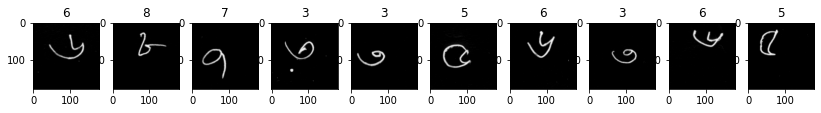

Predicted Values for Dataset 1: 


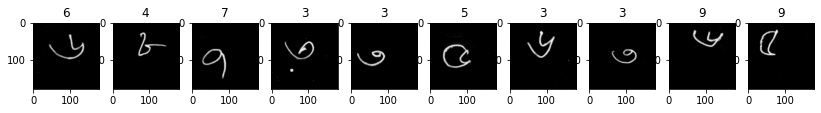

In [ ]:
num_predictions = 10

for images, labels in test_loader:
    break

predictions = model.forward(images[0:num_predictions].view(-1, 180*180).to(device))
predictions = torch.argmax(predictions, dim=1)

print('Actual Values for Dataset 1: ')
plt.figure(figsize=(14,14))
for i in range(num_predictions):
    ax=plt.subplot(1,num_predictions,i+1)
    ax.title.set_text(labels[i].item())
    plt.imshow(images[i].view(180, 180), cmap=plt.cm.binary)

plt.show()

print('Predicted Values for Dataset 1: ')
plt.figure(figsize=(14,14))
for i in range(num_predictions):
    ax=plt.subplot(1,num_predictions,i+1)
    ax.title.set_text(predictions[i].item())
    plt.imshow(images[i].view(180, 180), cmap=plt.cm.binary)

plt.show()

### **Loss Curve of Dataset -1**

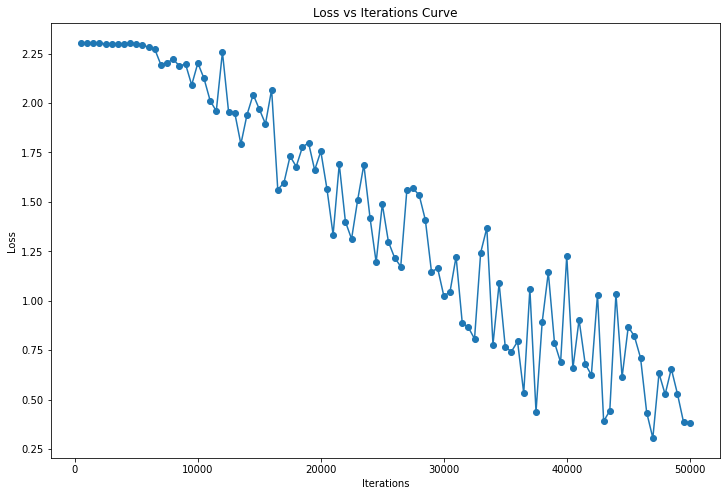

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(iterations,loss_data,marker='o')
plt.title('Loss vs Iterations Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## **Step - 3**

### **Train & Test Creation (Dataset - 2)**

In [ ]:
# label store
Train2_digits = np.array(df2_Train['label'])
Test2_digits = np.array(df2_Test['label'])

# label drop
df2_Train.drop(['label'],axis=1,inplace=True)
df2_Test.drop(['label'],axis=1,inplace=True)

# Image pixel convertion into numpy(uint8 datatype)
Train2_img = np.array(df2_Train, dtype=np.uint8)
Test2_img = np.array(df2_Test, dtype=np.uint8)

### **Image Data Creation (Dataset - 2)**

In [ ]:
Train2_imgTN = []
Test2_imgTN = []

transformer=transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])                         
])

matrixNum = int(math.sqrt(len(df2_Test.columns)))         #features=784, Sqrt(784)=28, 28*28 image

# Tensor transformation and normalization for Train Data
for index, data in enumerate(Train2_img,start=0):
  image = data.reshape(matrixNum,matrixNum)
  image_Ttrans2 = transformer(image)
  Train2_imgTN.append((image_Ttrans2,Train2_digits[index]))

# Tensor transformation and normalization for Test Data
for index, data in enumerate(Test2_img,start=0):
  image = data.reshape(matrixNum,matrixNum)
  image_Ttrans2 = transformer(image)
  Test2_imgTN.append((image_Ttrans2,Test2_digits[index]))

print('Train Data: ', len(Train2_imgTN))
print('Test Data: ', len(Test2_imgTN))

Train Data:  60000
Test Data:  10000


### **Dataset - 2 (Model Build, Accuracy, Prediction)**

**Model Build**

In [ ]:
batch_size = 50
num_iters = 50000
input_dim = matrixNum*matrixNum
num_hidden = 200
output_dim = 10
learning_rate = 0.01


model2 = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# To enable GPU
model2.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=learning_rate)

**Accuracy**

In [ ]:
loss_data2,iterations2 = [],[]
accuracy_data2 = []
iter = 0

num_epochs = math.ceil(num_iters / (len(Train2_imgTN) / batch_size))

train_loader2 = torch.utils.data.DataLoader(dataset=Train2_imgTN, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader2 = torch.utils.data.DataLoader(dataset=Test2_imgTN, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader2):

        images = images.view(-1, matrixNum*matrixNum).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model2(images) 


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter > 20000:
          break;

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader2:
                images = images.view(-1, matrixNum*matrixNum).to(device)

                # Forward pass only to get logits/output
                outputs = model2(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)
                # print(predicted)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total


            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, round(loss.item(),4), accuracy))

Iteration: 500. Loss: 2.2979. Accuracy: 10.1
Iteration: 1000. Loss: 2.2698. Accuracy: 29.7
Iteration: 1500. Loss: 1.6624. Accuracy: 20.38
Iteration: 2000. Loss: 1.5352. Accuracy: 31.15
Iteration: 2500. Loss: 0.9799. Accuracy: 59.36
Iteration: 3000. Loss: 0.7304. Accuracy: 67.14
Iteration: 3500. Loss: 0.9489. Accuracy: 65.73
Iteration: 4000. Loss: 0.5938. Accuracy: 73.55
Iteration: 4500. Loss: 0.4435. Accuracy: 71.92
Iteration: 5000. Loss: 1.0062. Accuracy: 72.16
Iteration: 5500. Loss: 0.4389. Accuracy: 76.61
Iteration: 6000. Loss: 0.8158. Accuracy: 76.73
Iteration: 6500. Loss: 0.6004. Accuracy: 78.75
Iteration: 7000. Loss: 0.4424. Accuracy: 79.44
Iteration: 7500. Loss: 0.5165. Accuracy: 80.94
Iteration: 8000. Loss: 0.4262. Accuracy: 82.47
Iteration: 8500. Loss: 0.464. Accuracy: 81.94
Iteration: 9000. Loss: 0.5658. Accuracy: 79.91
Iteration: 9500. Loss: 0.2616. Accuracy: 82.64
Iteration: 10000. Loss: 0.7078. Accuracy: 83.3
Iteration: 10500. Loss: 0.3296. Accuracy: 84.4
Iteration: 11000.

**Prediction**

Actual Values for Dataset 2: 


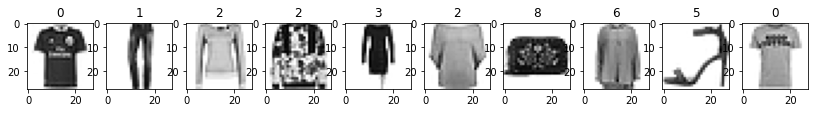

Predicted Values for Dataset 2: 


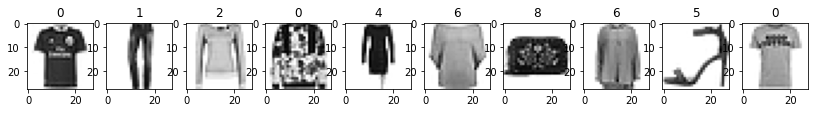

In [ ]:
num_predictions = 10

for images, labels in test_loader2:
    break

predictions = model2.forward(images[0:num_predictions].view(-1, matrixNum*matrixNum).to(device))
predictions = torch.argmax(predictions, dim=1)

print('Actual Values for Dataset 2: ')
plt.figure(figsize=(14,14))
for i in range(num_predictions):
    ax=plt.subplot(1,num_predictions,i+1)
    ax.title.set_text(labels[i].item())
    plt.imshow(images[i].view(matrixNum, matrixNum), cmap=plt.cm.binary)

plt.show()

print('Predicted Values for Dataset 2: ')
plt.figure(figsize=(14,14))
for i in range(num_predictions):
    ax=plt.subplot(1,num_predictions,i+1)
    ax.title.set_text(predictions[i].item())
    plt.imshow(images[i].view(matrixNum, matrixNum), cmap=plt.cm.binary)

plt.show()